# Qiskit Reference

**Reference:** [Qiskit Documentation](https://quantum.cloud.ibm.com/docs/en/guides)

## Importing

In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, Parameter
from qiskit.quantum_info import Statevector, Operator

import numpy as np

## Creating Basic Circuits

**Reference:** [Qiskit Quantum Circuits](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit)

Examples:

In [2]:
quantum_register = QuantumRegister(size=2, name="x")
ancilla_register = AncillaRegister(
    size=1, name="a"
)  # same as a QuantumRegister, its purpose is only for bookkeeping

quantum_circuit = QuantumCircuit(
    quantum_register, ancilla_register, name="exmaple circuit"
)

We can now add some gates:

In [3]:
quantum_circuit.h(quantum_register[0])  # quantum_circuit.h(0)
quantum_circuit.cx(quantum_register[0], quantum_register[1])  # quantum_circuit.cx(0, 1)
quantum_circuit.ccx(
    quantum_register[0], quantum_register[1], ancilla_register[0]
)  # quantum_circuit.ccx(0, 1, 2)
quantum_circuit.y(ancilla_register[0]);  # quantum_circuit.y(12)

We can see the complex matrix associated to the circuit, using [Operator](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.quantum_info.Operator):

In [4]:
Operator(quantum_circuit).data

array([[0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.-0.70710678j, 0.-0.70710678j, 0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.-0.70710678j, 0.+0.70710678j],
       [0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.-0.70710678j, 0.-0.70710678j],
       [0.-0.70710678j, 0.+0.70710678j, 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       [0.+0.70710678j, 0.+0.70710678j, 0.+0.j        , 0.+0.j        ,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.+0.j        , 0.+0.70710678j, 0.-0.70710678j,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.+0.j        ],
       [0.+0.j        , 0.+0.j        , 0.+0.70710678j, 0.+0.70710678j,
        0.+0.j        , 0.+0.j        , 0.+0.j        , 0.

We can clean up a little:

In [5]:
print(np.round(Operator(quantum_circuit).data, 3))

[[0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.-0.707j 0.-0.707j 0.+0.j
  0.+0.j   ]
 [0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.-0.707j
  0.+0.707j]
 [0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.-0.707j
  0.-0.707j]
 [0.-0.707j 0.+0.707j 0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j
  0.+0.j   ]
 [0.+0.707j 0.+0.707j 0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.j
  0.+0.j   ]
 [0.+0.j    0.+0.j    0.+0.707j 0.-0.707j 0.+0.j    0.+0.j    0.+0.j
  0.+0.j   ]
 [0.+0.j    0.+0.j    0.+0.707j 0.+0.707j 0.+0.j    0.+0.j    0.+0.j
  0.+0.j   ]
 [0.+0.j    0.+0.j    0.+0.j    0.+0.j    0.+0.707j 0.-0.707j 0.+0.j
  0.+0.j   ]]


We can print it better with $\LaTeX$:

In [6]:
Operator(quantum_circuit).draw("latex")

<IPython.core.display.Latex object>

Although it is usually easy to invert circuits, we can simply use the `inverse` method:

In [7]:
inverse_quantum_circuit = quantum_circuit.inverse()

## Visualization

We can also [visualize](https://quantum.cloud.ibm.com/docs/en/guides/visualize-circuits) it:

In [8]:
quantum_circuit.draw()

┌───┐               
x_0: ┤ H ├──■────■───────
     └───┘┌─┴─┐  │       
x_1: ─────┤ X ├──■───────
          └───┘┌─┴─┐┌───┐
  a: ──────────┤ X ├┤ Y ├
               └───┘└───┘

In [9]:
inverse_quantum_circuit.draw()

┌───┐
x_0: ───────■────■──┤ H ├
            │  ┌─┴─┐└───┘
x_1: ───────■──┤ X ├─────
     ┌───┐┌─┴─┐└───┘     
  a: ┤ Y ├┤ X ├──────────
     └───┘└───┘

We have other output styles:

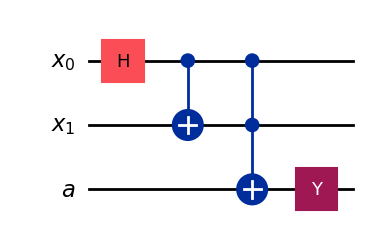

In [10]:
quantum_circuit.draw(output="mpl")

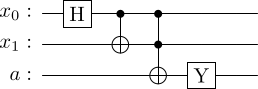

In [11]:
quantum_circuit.draw("latex")

To get the $\LaTeX$ code (for the [qcircuit](https://ctan.org/pkg/qcircuit?lang=en) package, and not the [Quantikz2](https://ctan.org/pkg/quantikz?lang=en)):

In [12]:
print(quantum_circuit.draw("latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{x}_{0} :  } & \lstick{{x}_{0} :  } & \gate{\mathrm{H}} & \ctrl{1} & \ctrl{1} & \qw & \qw & \qw\\
	 	\nghost{{x}_{1} :  } & \lstick{{x}_{1} :  } & \qw & \targ & \ctrl{1} & \qw & \qw & \qw\\
	 	\nghost{{a} :  } & \lstick{{a} :  } & \qw & \qw & \targ & \gate{\mathrm{Y}} & \qw & \qw\\
\\ }}
\end{document}


We also have a few [styles](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit):

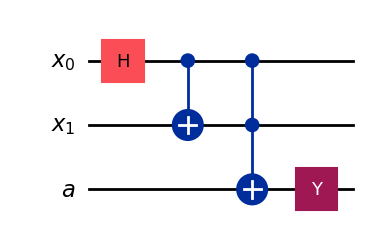

In [13]:
quantum_circuit.draw(output="mpl", style="iqp")  # default

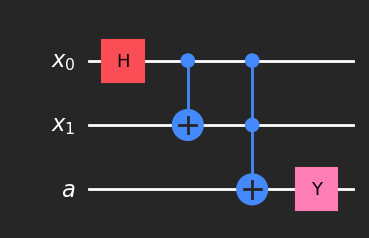

In [14]:
quantum_circuit.draw(output="mpl", style="iqp-dark")

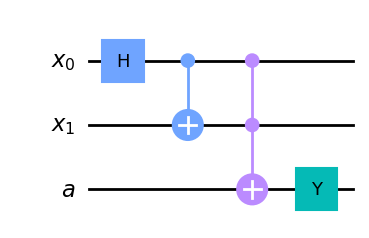

In [15]:
quantum_circuit.draw(output="mpl", style="clifford")

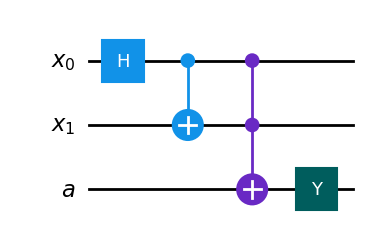

In [16]:
quantum_circuit.draw(output="mpl", style="textbook")

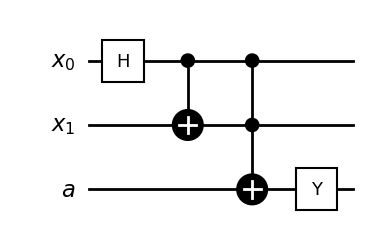

In [17]:
quantum_circuit.draw(output="mpl", style="bw")

## Multi-Controlled Gates

We can make multi-controlled gates:

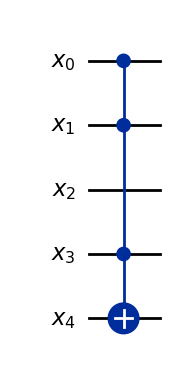

In [18]:
multi_x = QuantumCircuit(QuantumRegister(size=5, name="x"))
multi_x.mcx([0,1,3], 4)
multi_x.draw(output="mpl")

## States

We can get the result of a circuit when applied to the initial state $\left| 00 \cdots 0\right\rangle$:

In [18]:
psi = Statevector(quantum_circuit)
psi

Statevector([0.+0.j        , 0.+0.j        , 0.+0.j        ,
             0.-0.70710678j, 0.+0.70710678j, 0.+0.j        ,
             0.+0.j        , 0.+0.j        ],
            dims=(2, 2, 2))


The result is given as the coefficients in terms of a basis [order](https://quantum.cloud.ibm.com/docs/en/guides/bit-ordering#strings) as numbers:
\begin{align*}
  0=000_2:& \quad \left| 000 \right\rangle \\
  1=001_2:& \quad \left| 001 \right\rangle \\
  2=010_2:& \quad \left| 010 \right\rangle \\
  3=011_2:& \quad \left| 011 \right\rangle \\
  \vdots& \\
  7=111_2:& \quad \left| 111 \right\rangle \\
\end{align*}

We can visualize this state better:

In [19]:
psi.draw("latex")

<IPython.core.display.Latex object>

In [20]:
print(psi.draw("latex_source"))

- \frac{\sqrt{2} i}{2} |011\rangle+\frac{\sqrt{2} i}{2} |100\rangle


We can also get the correspond probabilities:

In [21]:
psi.probabilities()

array([0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. ])

In [22]:
psi.probabilities_dict()

{np.str_('011'): np.float64(0.4999999999999999),
 np.str_('100'): np.float64(0.4999999999999999)}

We can also create state vectors from strings:

In [23]:
Statevector.from_label("011").draw("latex")

<IPython.core.display.Latex object>

We can also use $|+\rangle$ and $|-\rangle$.  So, to get $|+\rangle \otimes |1\rangle \otimes |-\rangle$:

In [24]:
Statevector.from_label("+1-").draw("latex")

<IPython.core.display.Latex object>

We can also get state vectors from integers:

In [25]:
Statevector.from_int(3, dims=16).draw("latex")

<IPython.core.display.Latex object>

## Order

One has to be careful with the order of the qubits:

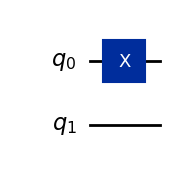

In [26]:
two_qubit_x = QuantumCircuit(2)
two_qubit_x.x(0)
two_qubit_x.draw("mpl")

Let's see what is the output:

In [27]:
Statevector(two_qubit_x).draw("latex")

<IPython.core.display.Latex object>

Hence, the input qubits are $|q_1q_0\rangle$, and not $|q_0 q_1\rangle$.  See the video [Why does Qiskit order its qubits the way it does?](https://www.youtube.com/watch?v=EiqHj3_Avps).

We can put the first qubit on top when drawing with `reverse_bits=True`:

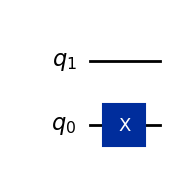

In [28]:
two_qubit_x = QuantumCircuit(2)
two_qubit_x.x(0)
two_qubit_x.draw("mpl", reverse_bits=True)

Or we can reverse the bits in the circuit itself:

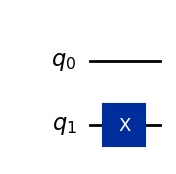

In [29]:
two_qubit_x = QuantumCircuit(2)
two_qubit_x.x(0)
two_qubit_x = two_qubit_x.reverse_bits()
two_qubit_x.draw("mpl")

In [30]:
Statevector(two_qubit_x).draw("latex")

<IPython.core.display.Latex object>

## Parameters

We can also add gates that depend on parameters, like rotation gates, using [Parameter](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.Parameter):

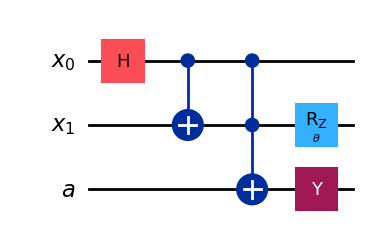

In [31]:
Theta = Parameter(r"$\theta$")

quantum_circuit.rz(Theta, quantum_register[1])
quantum_circuit.draw(output="mpl")

We can define the parameter to a new circuit:

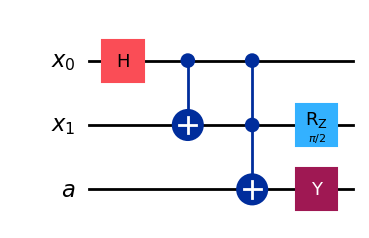

In [32]:
new_qc = quantum_circuit.assign_parameters({Theta: np.pi/2})

new_qc.draw("mpl")

## Gates:

We can make a circuit into a gate:

In [33]:
gate = quantum_circuit.to_gate(label="qc1")

Let's create a new circuit.

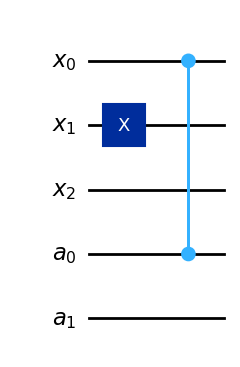

In [42]:
quantum_register = QuantumRegister(3, name="x")
ancilla_register = AncillaRegister(2, name="a")
quantum_circuit2 = QuantumCircuit(quantum_register, ancilla_register)

quantum_circuit2.x(quantum_register[1])
quantum_circuit2.cz(quantum_register[0], ancilla_register[0])

quantum_circuit2.draw("mpl")

We can now add the new gate:

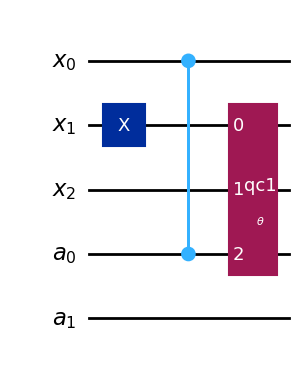

In [43]:
quantum_circuit2.compose(
    gate, [quantum_register[1], quantum_register[2], ancilla_register[0]], inplace=True
)  # note the inplace=True!
quantum_circuit2.draw("mpl")

We can also create "barriers" in our circuit to separate different pieces of the circuit.  In particular, it prevents Qiskit from moving gates around as well.

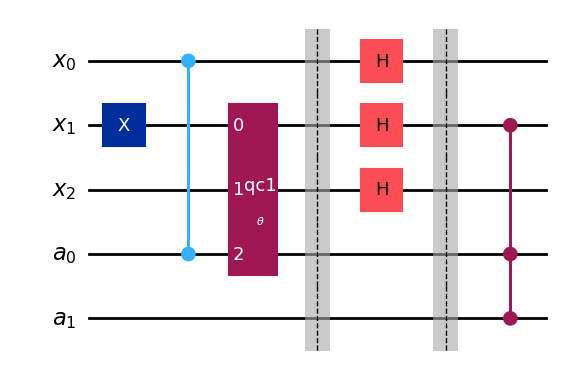

In [44]:
quantum_circuit2.barrier()
quantum_circuit2.h(quantum_register)
quantum_circuit2.barrier()
quantum_circuit2.ccz(quantum_register[1], ancilla_register[0], ancilla_register[1])


quantum_circuit2.draw("mpl")